## Task 2: Stock Prediction
#### Taking stock price of any company and predicting its price by using LSTM by using only Jupyter notebook code.

In [1]:
import yfinance as yf

# Downloading stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [2]:
data = data[['Close']]
data = data.dropna()

### Normalizing the data

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


### Creating training and test datasets

In [4]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

### Split into training and test sets

In [5]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

time_step = 60

# Creating datasets
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### Building the LSTM Model

In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training the model

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict stock prices
predictions = model.predict(X_test)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0922 - val_loss: 0.0141
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0

In [8]:
# Inverse transform predictions and true values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

### Visualizing the result

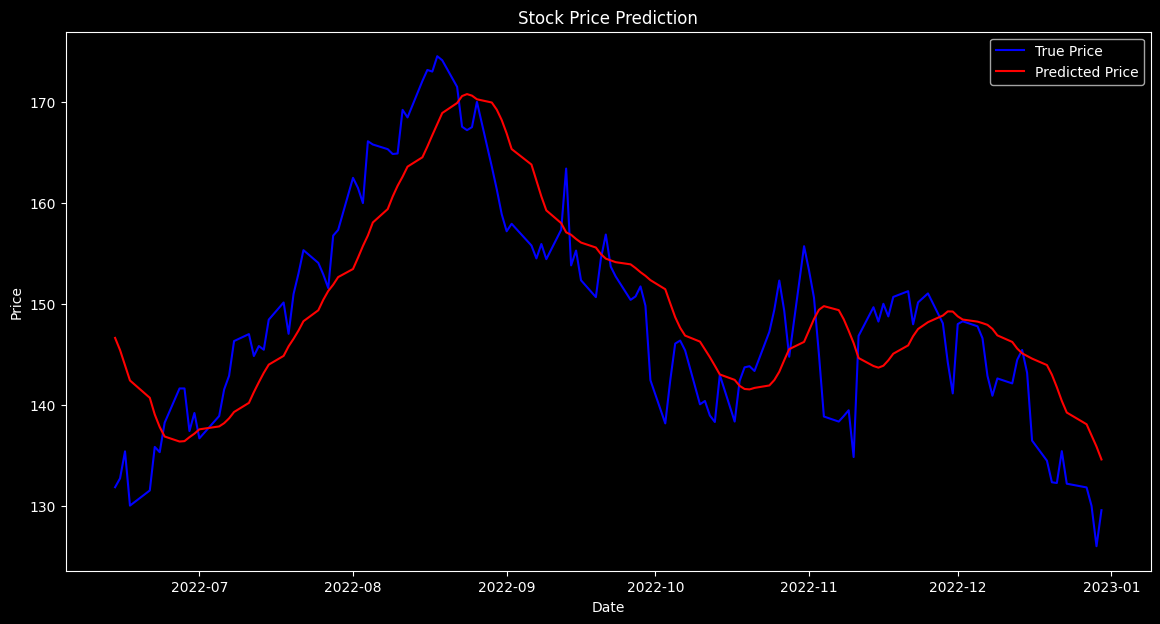

In [10]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='True Price')
plt.plot(data.index[-len(predictions):], predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()